# Travaux pratiques : Séance 4
## Troisième partie

Importation des librairies et des modules nécessaires

In [1]:
import matplotlib.pyplot as plt
from sklearn import datasets
from random import randint
from sklearn.cluster import KMeans

Fonction permettant d'afficher les données

In [2]:
def plot_clusters(data,labels,clusters_centers):
    colors = []
    for i in range(len(clusters_centers)):
        colors.append('#%06X' % randint(0, 0xFFFFFF))
    for i in range(len(clusters_centers)):
        plt.scatter(data[labels==i,0], data[labels==i,1], c=colors[i])
    plt.scatter(clusters_centers[:,0], clusters_centers[:,1], marker="*", s=300, edgecolor='black', c=colors)
    plt.xlabel('petal length (cm)')
    plt.ylabel('petal width (cm)')

Importation du dataset et sauvegarde de la partie data

In [3]:
iris = datasets.load_iris()
X = iris.data[:,2:]

Boucle générant 9 algorithmes K-means (1 pour chaque valeur du paramètre n_clusters entre 1 et 10) et calcul de la fonction objectif

In [4]:
objectif = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='random')
    kmeans.fit(X)
    objectif.append(kmeans.inertia_)

Affichage des valeurs de la fonction objectif en fonction de la valeur du paramètre n_clusters

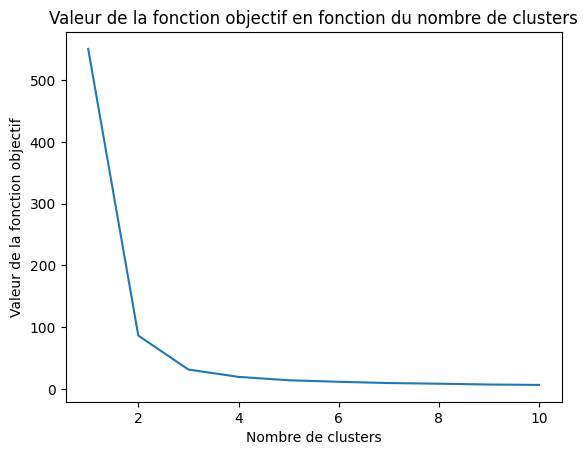

In [5]:
plt.plot(range(1,11), objectif)
plt.xlabel('Nombre de clusters')
plt.ylabel('Valeur de la fonction objectif')
plt.title('Valeur de la fonction objectif en fonction du nombre de clusters')
plt.show()

Entrainement du meilleur modèle

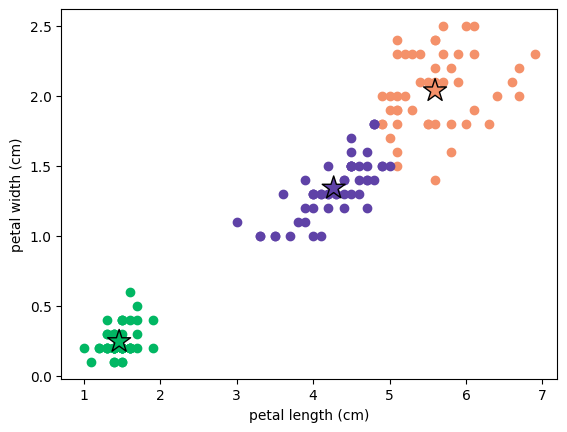

In [6]:
best_kmeans = KMeans(n_clusters=3, init='random')
best_kmeans.fit(X)
y = best_kmeans.labels_
clusters_centers = best_kmeans.cluster_centers_
plot_clusters(X, y, clusters_centers)

Calcul de la fonction objectif

In [7]:
objectif = best_kmeans.inertia_
print("La valeur de la fonction objectif est :", objectif)

La valeur de la fonction objectif est : 31.371358974358973


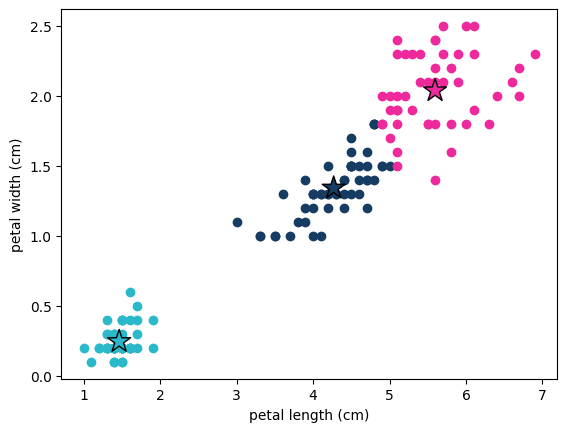

In [8]:
best_kmeans = KMeans(n_clusters=3, init='random')
best_kmeans.fit(X)
y = best_kmeans.labels_
clusters_centers = best_kmeans.cluster_centers_
plot_clusters(X, y, clusters_centers)

### contre-vérification

In [9]:
def plot_dataset(dataset,index_feature1,index_feature2):
    colors = ['red','blue','green']
    for i in range(len(dataset.target_names)):
        plt.scatter(dataset.data[dataset.target==i,index_feature1], dataset.data[dataset.target==i,index_feature2], c=colors[i], label= dataset.target_names[i])
    plt.xlabel(dataset.feature_names[index_feature1])
    plt.ylabel(dataset.feature_names[index_feature2])
    plt.legend()
    plt.show()

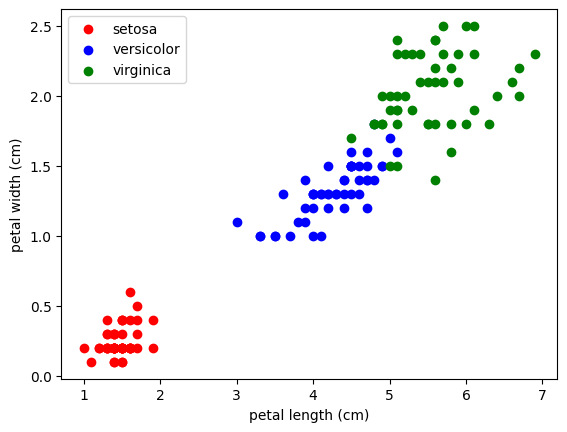

In [10]:
plot_dataset(iris,2,3)